In [65]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import time

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>Tiempo vs cantidad de threads (tamaño fijo)</h1>

<h3>Secuencial</h3>

In [69]:
cuantas = 100
exps = ["1", "5", "8", "10", "16", "20", "25", "32", "40", "64"]
experimentos = np.zeros((len(exps), cuantas))

paralelo = 0
X = 10000
Y = 10000
cant_jugadores = 1
banderaX = 9999
banderaY = 9999
#'sudo', 'nice', '-n', '-20', 
comando = ['nice', '-n', '0', './bandera', str(paralelo), str(X), str(Y), str(cant_jugadores), str(banderaX), str(banderaY)]
time.sleep(60)
for i in range(len(exps)):
    resultados = []
    for j in range(cuantas):
        comando[-3] = exps[i]
        result = subprocess.run(comando, stdout=subprocess.PIPE, encoding='ascii')
        result = result.stdout.split('\n')
        resultados.append(int(result[0].split(' ')[-2]))  # tomamos del output de C++ la medida de tiempo en nanosegundos
    res = np.array(resultados)
    experimentos[i] = res
    print(res.mean()/10**9)
    print(res.std()/10**9)
    print('------------------')
    time.sleep(60)  # sleep para dejar enfriar CPU entre experimentos para minimizar CPU throttling

0.1823922482
0.0013993458969032851
------------------
0.18259678153
0.001261153434010743
------------------
0.18234019847
0.0010500064043514827
------------------
0.18246164737
0.0010653291971030425
------------------
0.18277681509000002
0.001353756733871445
------------------
0.18267740737000002
0.0011588393194234881
------------------
0.18252761013
0.0011825239641041247
------------------
0.18272308735
0.0015462600874776623
------------------
0.18233678659
0.0011925221847848629
------------------
0.18281803488999998
0.0012701487413541445
------------------


<h3>Paralelo</h3>

In [72]:
cuantas = 100
exps = ["1", "5", "8", "10", "16", "20", "25", "32", "40", "64"]
experimentos2 = np.zeros((len(exps), cuantas))

paralelo = 1
X = 10000
Y = 10000
cant_jugadores = 1
banderaX = 9999
banderaY = 9999
#'sudo', 'nice', '-n', '-20', 
comando = ['nice', '-n', '0', './bandera', str(paralelo), str(X), str(Y), str(cant_jugadores), str(banderaX), str(banderaY)]
for i in range(len(exps)):
    resultados = []
    for j in range(cuantas):
        comando[-3] = exps[i]  # pisamos la cantidad de jugadores (threads)
        result = subprocess.run(comando, stdout=subprocess.PIPE, encoding='ascii')
        result = result.stdout.split('\n')
        resultados.append(int(result[0].split(' ')[-2]))
    res = np.array(resultados)
    experimentos2[i] = res
    print(res.mean()/10**9)
    print(res.std()/10**9)
    print('------------------')
    time.sleep(60)  # sleep para dejar enfriar CPU entre experimentos para minimizar CPU throttling

0.23719616605000002
0.0016181613449424961
------------------
0.04807594325
0.00016483010637765027
------------------
0.03027932367
0.0001940227760262725
------------------
0.044728912880000006
0.00015170326335720531
------------------
0.028358113350000002
0.0001921983374900197
------------------
0.03256561789
0.002210672600972201
------------------
0.03213820938
0.002890680595298297
------------------
0.028652003699999998
0.0019365975887974533
------------------
0.02536414591
0.003502789835432746
------------------
0.02420855146
0.005822571706691728
------------------


<h2>Graficar resultados</h2>

<h3>Cargar resultados de .csv</h3>

In [ ]:
experimentos = np.loadtxt('exp1NP.csv', delimiter=',')
experimentos2 = np.loadtxt('exp1P.csv', delimiter=',')

<h3>Media</h3>

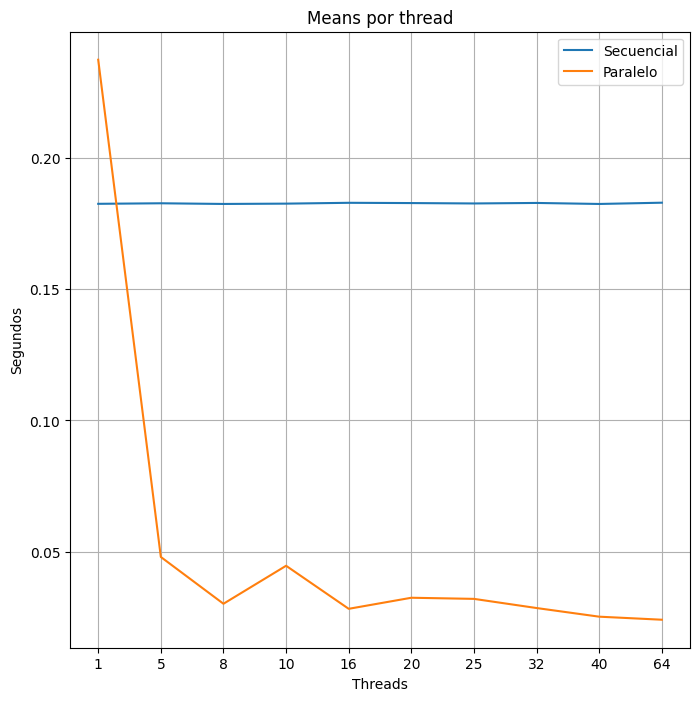

In [89]:
exps = ["1", "5", "8", "10", "16", "20", "25", "32", "40", "64"]
x = np.array(exps)
plt.rcParams["figure.figsize"] = (8, 8)
plt.grid(True)
plt.plot(x, experimentos.mean(axis=1)/10**9)
plt.plot(x, experimentos2.mean(axis=1)/10**9)
plt.legend(["Secuencial", "Paralelo"])
plt.title("Means por thread")
plt.xlabel("Threads")
plt.ylabel("Segundos")
plt.savefig("exp1.svg")

<h3>Desvio estandar</h3>

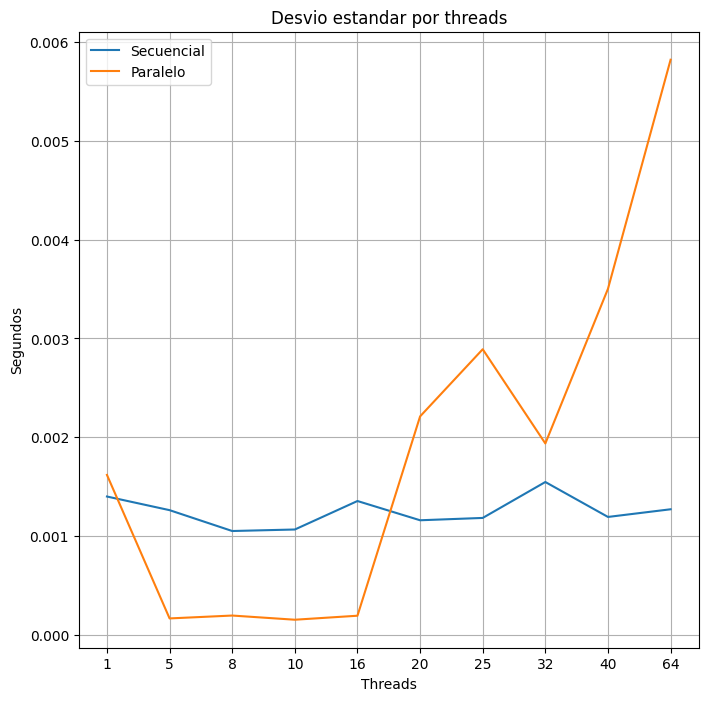

In [90]:
exps = ["1", "5", "8", "10", "16", "20", "25", "32", "40", "64"]
x = np.array(exps)
plt.rcParams["figure.figsize"] = (8, 8)
plt.grid(True)
plt.plot(x, experimentos.std(axis=1)/10**9)
plt.plot(x, experimentos2.std(axis=1)/10**9)
plt.legend(["Secuencial", "Paralelo"])
plt.title("Desvio estandar por threads")
plt.xlabel("Threads")
plt.ylabel("Segundos")
plt.savefig("exp1Var.svg")

<h2>Guardar resultados en .csv</h2>

In [91]:
np.savetxt('exp1P.csv', experimentos2, delimiter=',')
np.savetxt('exp1NP.csv', experimentos, delimiter=',')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>Tiempo vs tamaño (paralelo y secuencial)</h1>

<h3>Secuencial</h3>

In [103]:
cuantas = 100
exps = ["20", "40", "100", "200", "500", "1000", "2000"]
experimentos4 = np.zeros((len(exps), cuantas))

paralelo = 0
comando = ['nice', '-n', '0', './bandera', str(paralelo), str(X), str(Y), str(cant_jugadores), str(banderaX), str(banderaY)]
for i in range(len(exps)):
    resultados = []
    for j in range(cuantas):
        comando[-5] = exps[i]
        comando[-4] = exps[i]
        comando[-2] = str(int(exps[i])-1)
        comando[-1] = str(int(exps[i])-1)
        result = subprocess.run(comando, stdout=subprocess.PIPE, encoding='ascii')
        result = result.stdout.split('\n')
        resultados.append(int(result[0].split(' ')[-2]))
    res = np.array(resultados)
    experimentos4[i] = res
    print(res.mean()/10**9)
    print(res.std()/10**9)
    print('------------------')

9.0231e-07
1.7737478372079838e-07
------------------
2.94337e-06
2.303310510981965e-07
------------------
1.77745e-05
1.3733170755510179e-06
------------------
7.50181e-05
1.2136165652709262e-05
------------------
0.00044549307000000003
1.6548946511035075e-05
------------------
0.0018943947800000001
0.00018303398833875527
------------------
0.00787303032
0.000470746782781845
------------------


<h3>Paralelo</h3>

In [102]:
cuantas = 100
exps = ["20", "40", "100", "200", "500", "1000", "2000"]
experimentos3 = np.zeros((len(exps), cuantas))

paralelo = 1
cant_jugadores = 16
comando = ['nice', '-n', '0', './bandera', str(paralelo), str(X), str(Y), str(cant_jugadores), str(banderaX), str(banderaY)]
for i in range(len(exps)):
    resultados = []
    for j in range(cuantas):
        comando[-5] = exps[i]
        comando[-4] = exps[i]
        comando[-2] = str(int(exps[i])-1)
        comando[-1] = str(int(exps[i])-1)
        result = subprocess.run(comando, stdout=subprocess.PIPE, encoding='ascii')
        result = result.stdout.split('\n')
        resultados.append(int(result[0].split(' ')[-2]))
    res = np.array(resultados)
    experimentos3[i] = res
    print(res.mean()/10**9)
    print(res.std()/10**9)
    print('------------------')

0.0002301645
4.13867349670157e-05
------------------
0.00022695527
9.270372576621233e-05
------------------
0.00022959784
0.00012272697752439924
------------------
0.00034828663
0.0003494096823769386
------------------
0.00036987156
0.000284276760188353
------------------
0.00059786549
0.00018362198255641914
------------------
0.0017415508
0.0003667950116503222
------------------


<h2>Graficar resultados</h2>

<h3>Cargar resultados de .csv</h3>

In [ ]:
experimentos3 = np.loadtxt('exp2P.csv', delimiter=',')
experimentos4 = np.loadtxt('exp2NP.csv', delimiter=',')

<h3>Graficar</h3>

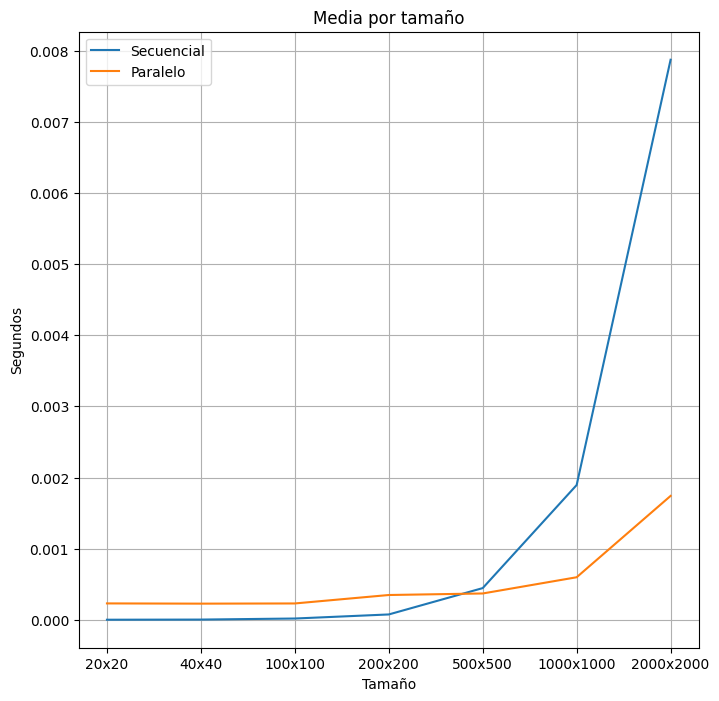

In [123]:
exps = ["20x20", "40x40", "100x100", "200x200", "500x500", "1000x1000", "2000x2000"]
x = np.array(exps)
plt.rcParams["figure.figsize"] = (8, 8)
plt.grid(True)
plt.plot(x, experimentos4.mean(axis=1)/10**9)
plt.plot(x, experimentos3.mean(axis=1)/10**9)
plt.legend(["Secuencial", "Paralelo"])
plt.title("Media por tamaño")
plt.xlabel("Tamaño")
plt.ylabel("Segundos")
plt.savefig("exp2.svg")

<h3>Guardar resultados en .csv</h3>

In [114]:
np.savetxt('exp2P.csv', experimentos3, delimiter=',')
np.savetxt('exp2NP.csv', experimentos4, delimiter=',')